<a href="https://colab.research.google.com/github/vidheeshnacode/SM/blob/master/TS_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-20,114.080002,114.349998,111.629997,112.650002,104.101456,68501600
1,2015-08-21,110.430000,111.900002,105.650002,105.760002,97.734299,128275500
2,2015-08-24,94.870003,108.800003,92.000000,103.120003,95.294647,162206300
3,2015-08-25,111.110001,111.110001,103.500000,103.739998,95.867607,103601600
4,2015-08-26,107.089996,109.889999,105.050003,109.690002,101.366074,96774600
...,...,...,...,...,...,...,...
1254,2020-08-13,457.720001,464.170013,455.709991,460.040009,460.040009,52520500
1255,2020-08-14,459.320007,460.000000,452.179993,459.630005,459.630005,41391300
1256,2020-08-17,464.250000,464.350006,455.850006,458.429993,458.429993,29890400
1257,2020-08-18,457.410004,464.000000,456.029999,462.250000,462.250000,26408400


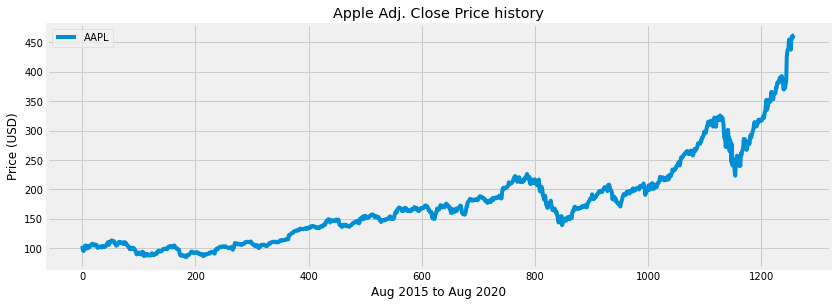

In [ ]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price history')
plt.xlabel('Aug 2015 to Aug 2020')
plt.ylabel('Price (USD)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
#Simple moving average
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,401.442118
1255,404.647963
1256,407.489724
1257,410.497415


In [ ]:
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,333.806227
1255,335.944823
1256,338.084958
1257,340.134674


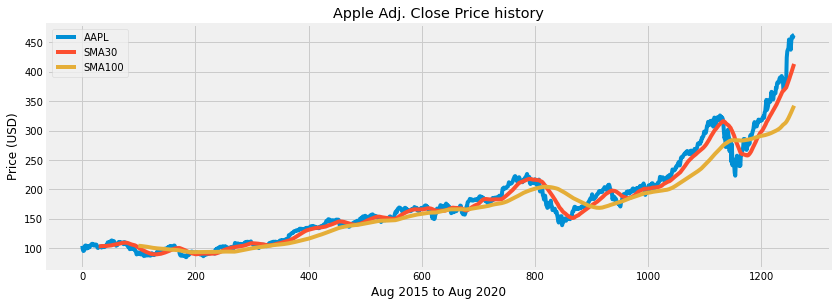

In [ ]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price history')
plt.xlabel('Aug 2015 to Aug 2020')
plt.ylabel('Price (USD)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,104.101456,NaN,NaN
1,97.734299,NaN,NaN
2,95.294647,NaN,NaN
3,95.867607,NaN,NaN
4,101.366074,NaN,NaN
...,...,...,...
1254,460.040009,401.442118,333.806227
1255,459.630005,404.647963,335.944823
1256,458.429993,407.489724,338.084958
1257,462.250000,410.497415,340.134674


In [ ]:
#Signal
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)



In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal'] = buy_sell[0]
data['Sell_Signal'] = buy_sell[1]



In [ ]:
data

,AAPL,SMA30,SMA100,Buy_Signal,Sell_Signal
0,104.101456,NaN,NaN,NaN,NaN
1,97.734299,NaN,NaN,NaN,NaN
2,95.294647,NaN,NaN,NaN,NaN
3,95.867607,NaN,NaN,NaN,NaN
4,101.366074,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1254,460.040009,401.442118,333.806227,NaN,NaN
1255,459.630005,404.647963,335.944823,NaN,NaN
1256,458.429993,407.489724,338.084958,NaN,NaN
1257,462.250000,410.497415,340.134674,NaN,NaN


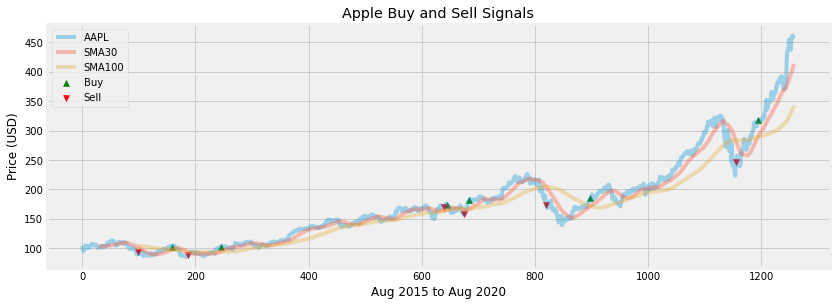

In [ ]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Buy and Sell Signals')
plt.xlabel('Aug 2015 to Aug 2020')
plt.ylabel('Price (USD)')
plt.legend(loc = 'upper left')
plt.show()